<p align="center">
  <img src="./Report/alev-takil-TuFsbn5gedo-unsplash.jpg" width="800">
</p>
Let's start

### Let's import all the dependencies

In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

import warnings
warnings.filterwarnings('ignore')

### Let's connect to our database

In [3]:
connection = sqlite3.connect('travel.sqlite')
cu = connection.cursor()
# to send SQL statements, iterate over the cursor to fetch results, and call methods

### Let's view our tables

In [4]:
cu.execute("""
    SELECT name
    FROM sqlite_master
    WHERE type = 'table';
""")
print('List of tables present in the database')
table_list = [table[0] for table in cu.fetchall()]
table_list

List of tables present in the database


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

### Data exploration

#### table-1: aircraft_data

In [5]:
aircraft_data = pd.read_sql_query("SELECT * FROM aircrafts_data", connection)
#lets view the rows
print(aircraft_data.shape)
aircraft_data.head()

(9, 3)


,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600


In [6]:
# as here there are many other languages so we'll leave them only keep th english format
aircraft_data['model'] = aircraft_data['model'].apply(lambda x: json.loads(x)['en'])
#here we can also use map() function instead of apply() function

In [7]:
aircraft_data.head()

,aircraft_code,model,range
0,773,Boeing 777-300,11100
1,763,Boeing 767-300,7900
2,SU9,Sukhoi Superjet-100,3000
3,320,Airbus A320-200,5700
4,321,Airbus A321-200,5600


#### table-2: airports_data

In [8]:
airports_data = pd.read_sql_query('SELECT * FROM airports_data', connection)
print(airports_data.shape)
airports_data.head()

(104, 5)


,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin


In [9]:
# as here also there are many other languages so we'll leave them only keep th english format
airports_data['airport_name'] = airports_data['airport_name'].apply(lambda x: json.loads(x)['en'])
airports_data['city'] = airports_data['city'].apply(lambda x: json.loads(x)['en'])

In [10]:
airports_data.head()

,airport_code,airport_name,city,coordinates,timezone
0,YKS,Yakutsk Airport,Yakutsk,"(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,Mirny Airport,Mirnyj,"(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,Khabarovsk-Novy Airport,Khabarovsk,"(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,Yelizovo Airport,Petropavlovsk,"(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,Yuzhno-Sakhalinsk Airport,Yuzhno-Sakhalinsk,"(142.718002319335938,46.8886985778808594)",Asia/Sakhalin


#### table-3: boarding_passes

In [11]:
boarding_passes = pd.read_sql_query('SELECT * FROM boarding_passes', connection)
print(boarding_passes.shape)
boarding_passes.head()

(579686, 4)


,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


#### table-4: bookings

In [12]:
bookings = pd.read_sql_query('SELECT * FROM bookings', connection)
print(bookings.shape)
bookings.head()

(262788, 3)


,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600


#### table-5: flights

In [13]:
flights = pd.read_sql_query('SELECT * FROM flights', connection)
print(flights.shape)
flights.head()

(33121, 10)


,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


#### table-6: seats

In [14]:
seats = pd.read_sql_query('SELECT * FROM seats', connection)
print(seats.shape)
seats.head()

(1339, 3)


,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business


#### table-7: ticket_flights

In [15]:
ticket_filghts = pd.read_sql_query('SELECT * FROM ticket_flights', connection)
print(ticket_filghts.shape)
ticket_filghts.head()

(1045726, 4)


,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


#### table-8: tickets

In [16]:
tickets = pd.read_sql_query('SELECT * FROM tickets', connection)
print(tickets.shape)
tickets.head()

(366733, 3)


,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589


#### Lets see the datatypes of all the columns


In [17]:
for table in table_list:
    print('\ntable:', table)
    column_info = connection.execute("PRAGMA table_info({})".format(table))
    for col in column_info.fetchall():
        print(col[1:3])



table: aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')

table: airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')

table: boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')

table: bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')

table: flights
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')

table: seats
('aircraft_code', 'character(3)')
('seat_no', 'character varying(4

In [18]:
# checking any missing values
for table in table_list:
    print("\ntable:", table)
    df_table = pd.read_sql_query(f"SELECT * FROM {table}", connection)
    print(df_table.isnull().sum())



table: aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

table: airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

table: boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

table: bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

table: flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

table: seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

table: ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

table: tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


we obtain there is no missing value in our dataset

## Analysis

### Q1. How many planes have more than100 seats?

In [19]:
pd.read_sql_query("""
    SELECT aircraft_code,
    COUNT(*) AS num_of_seats
    FROM seats
    GROUP BY aircraft_code
    HAVING num_of_seats > 100
""", connection)

,aircraft_code,num_of_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


### Q2. How the number of tickets booked and total amount earned changes with time

In [20]:
tickets = pd.read_sql_query("""
SELECT *
FROM tickets AS t
INNER JOIN bookings AS b
ON t.book_ref = b.book_ref
""", connection)

In [21]:
#Using pandas 1st we will change the data type of the book_date column from object to date time so that we can plot it in line chart
tickets['book_date'] = pd.to_datetime(tickets['book_date'])
tickets['date'] = tickets['book_date'].dt.date

#using group by on date to find how mny tickets are booked per day
no = tickets.groupby('date')[['date']].count()


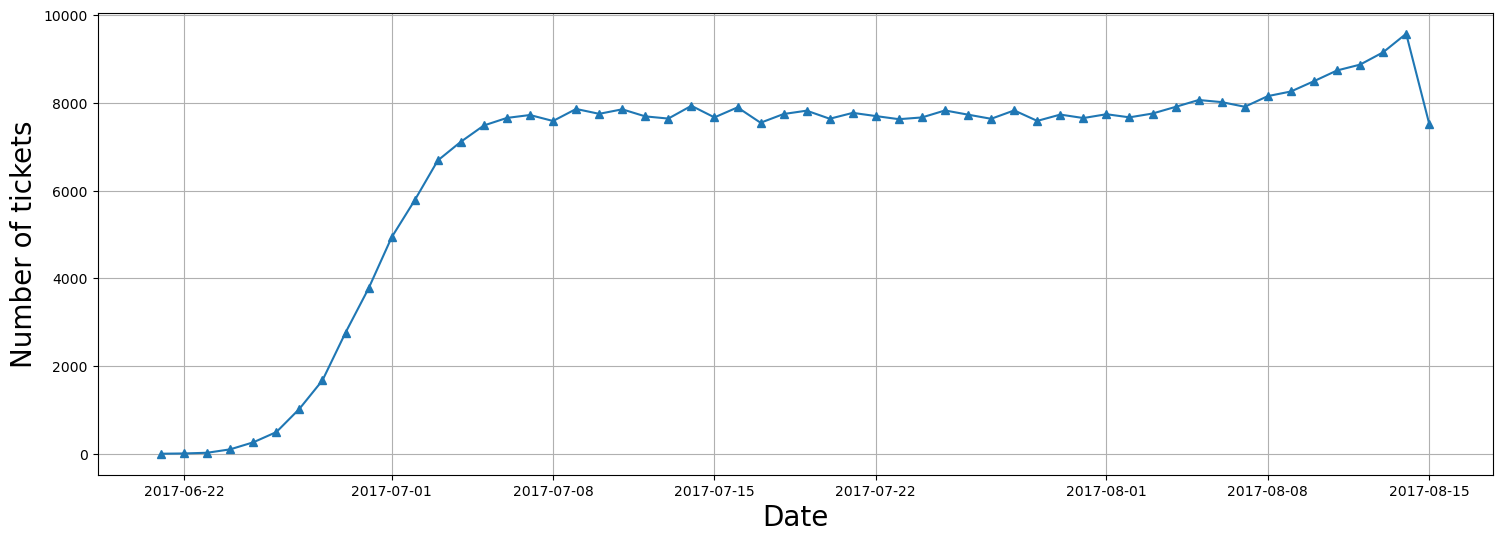

In [22]:
# now plotting the chart
plt.figure(figsize = (18, 6))
plt.plot(no.index, no['date'], marker = '^')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Number of tickets', fontsize = 20)
plt.grid('b')
plt.show()

In [23]:
bookings = pd.read_sql_query("""
SELECT *
FROM bookings
""", connection)
#Using pandas 1st we will change the data type of the book_date column from object to date time so that we can plot it in line chart
bookings['book_date'] = pd.to_datetime(bookings['book_date'])

# now creating a new column which only contains the date from book_date column
bookings['date'] = bookings['book_date'].dt.date

#using group by on date to find how mny tickets are booked per day
amount = bookings.groupby('date')[['total_amount']].sum()
print(bookings.head())
print(amount.head())

  book_ref                 book_date  total_amount        date
0   00000F 2017-07-05 03:12:00+03:00        265700  2017-07-05
1   000012 2017-07-14 09:02:00+03:00         37900  2017-07-14
2   000068 2017-08-15 14:27:00+03:00         18100  2017-08-15
3   000181 2017-08-10 13:28:00+03:00        131800  2017-08-10
4   0002D8 2017-08-07 21:40:00+03:00         23600  2017-08-07
            total_amount
date                    
2017-06-21        441900
2017-06-22        775300
2017-06-23       1822000
2017-06-24       5977000
2017-06-25      15305400


In [24]:
amount.columns

Index(['total_amount'], dtype='object')

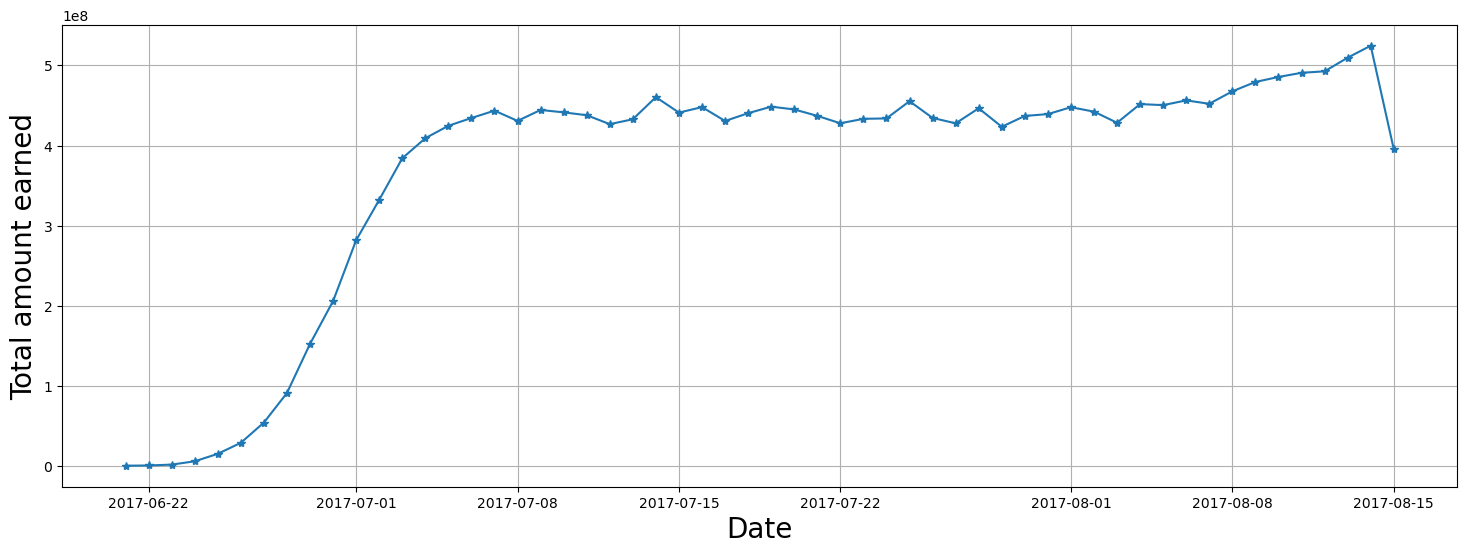

In [25]:
#now lets plot
plt.figure(figsize =(18, 6))
plt.plot(amount.index, amount['total_amount'], marker = '*')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Total amount earned', fontsize= 20)
plt.grid('b')
plt.show()

#### Q3. calculate the average charges for each aircraft with different fare conditions

In [31]:
# As flight table contains both floght_id and aircraft_code 
df = pd.read_sql_query("""
SELECT 
fare_conditions,
aircraft_code,
AVG(amount)
FROM ticket_flights AS t
JOIN
flights AS f
ON t.flight_id = f.flight_id
GROUP BY aircraft_code, fare_conditions
""", connection)
df.head()

,fare_conditions,aircraft_code,AVG(amount)
0,Business,319,113550.557703
1,Economy,319,38311.402347
2,Business,321,34435.662664
3,Economy,321,11534.974764
4,Business,733,41865.626175


<Axes: xlabel='aircraft_code', ylabel='AVG(amount)'>

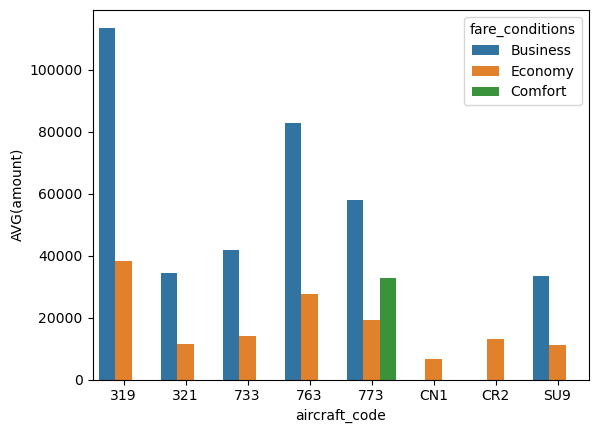

In [33]:
# chart
sns.barplot(data = df, x ='aircraft_code', y = 'AVG(amount)', hue = 'fare_conditions')

## Analysis of occupany rate

#### step-1: For each aircraft, calculate the total revenue per year and average revenue per ticket

In [61]:
pd.read_sql_query("""
SELECT aircraft_code, ticket_count, total_revenue, total_revenue/ticket_count AS avg_rev_per_ticket FROM
(SELECT aircraft_code, COUNT(*) as ticket_count, SUM(amount) AS total_revenue
FROM ticket_flights AS t
JOIN flights AS f
ON t.flight_id = f.flight_id
GROUP BY aircraft_code)

                  
""", connection)

,aircraft_code,ticket_count,total_revenue,avg_rev_per_ticket
0,319,52853,2706163100,51201
1,321,107129,1638164100,15291
2,733,86102,1426552100,16568
3,763,124774,4371277100,35033
4,773,144376,3431205500,23765
5,CN1,14672,96373800,6568
6,CR2,150122,1982760500,13207
7,SU9,365698,5114484700,13985


#### step-2: calculate the average occupany per aircraft

In [57]:
occupancy_rate = pd.read_sql_query("""
                  SELECT a.aircraft_code, avg(a.seats_count) as booked_seats, b.num_seats, avg(a.seats_count)/b.num_seats AS occupancy_rate FROM
                  (
                  SELECT aircraft_code, flights.flight_id, count(*) AS seats_count from boarding_passes
                  INNER JOIN flights
                  ON boarding_passes.flight_id = flights.flight_id
                  GROUP BY aircraft_code, flights.flight_id) AS a
                  INNER JOIN
                  (SELECT aircraft_code, count(*) AS num_seats FROM seats GROUP BY aircraft_code) AS b
                  ON a.aircraft_code = b.aircraft_code
                  GROUP BY a.aircraft_code
""", connection)
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate
0,319,53.58318098720292,116,0.46192397402761143
1,321,88.80923076923077,170,0.5224072398190045
2,733,80.25546218487395,130,0.617349709114415
3,763,113.93729372937294,222,0.5132310528350132
4,773,264.9258064516129,402,0.659019419033863
5,CN1,6.004431314623338,12,0.5003692762186115
6,CR2,21.48284690220174,50,0.42965693804403476
7,SU9,56.81211267605634,97,0.5856918832583128


#### Step-3: Calculate by how much the total annual turnover could increase by giving all aircraft a 10% higher occupany rate.

In [58]:
occupancy_rate['Inc occupancy rate'] = occupancy_rate['occupancy_rate']+occupancy_rate['occupancy_rate']*0.1
occupancy_rate


,aircraft_code,booked_seats,num_seats,occupancy_rate,Inc occupancy rate
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144


In [59]:
pd.set_option('display.float_format', str)

In [60]:
total_revenue = pd.read_sql_query("""
                                  SELECT aircraft_code, SUM(amount) AS total_revenue FROM ticket_flights
                                  JOIN flights
                                  ON ticket_flights.flight_id = flights.flight_id 
                                  GROUP BY aircraft_code
                                  
""", connection)
occupancy_rate['Inc total annual turnover']= (total_revenue['total_revenue']/occupancy_rate['occupancy_rate'])*occupancy_rate['occupancy_rate']
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,Inc occupancy rate,Inc total annual turnover
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2706163100.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1638164100.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1426552100.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4371277100.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492,3431205500.0
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,96373800.0
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382,1982760500.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144,5114484700.0
